

-----

## Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

The fundamental idea behind **ensemble techniques** is to combine the predictions from **multiple individual models** (often called "weak learners" or "base estimators") to produce a final, more robust, and generally more accurate prediction than any of the individual models could achieve alone. This is based on the principle that a collection of diverse, imperfect models can collectively overcome individual errors and biases. The core mechanisms for combining results are typically **averaging** (for regression) or **voting** (for classification).

-----

### Bagging vs. Boosting

| Feature | Bagging (Bootstrap Aggregating) | Boosting |
| :--- | :--- | :--- |
| **Approach** | **Parallel.** Base models are trained independently and simultaneously. | **Sequential/Iterative.** Base models are trained one after another, with each subsequent model focusing on the errors of the previous ones. |
| **Objective** | **Reduce Variance** and prevent overfitting. It works best with **high-variance** models (like unpruned decision trees). | **Reduce Bias** and convert a set of weak learners into a single strong learner. It works best with **high-bias** models (like simple decision stumps). |
| **Data Sampling** | Uses **bootstrap sampling** (sampling with replacement) to create multiple diverse subsets of the training data. Each model is trained on one subset. | The full training data is used, but **weights** are applied to the samples. Subsequent models *up-weight* misclassified samples. |
| **Model Weighting** | The final predictions are combined using simple **averaging** (regression) or **majority voting** (classification). All models have equal say. | Models are typically **weighted** based on their performance. Better-performing models have a greater influence on the final prediction. |
| **Example** | **Random Forest, Extra Trees.** | **AdaBoost, Gradient Boosting (XGBoost, LightGBM, CatBoost).** |

-----

## Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

A **Random Forest Classifier** is an ensemble method that uses **bagging** (Bootstrap Aggregating) and a specific feature randomization step to significantly reduce overfitting compared to a single, unpruned **Decision Tree**.

### Overfitting Reduction Mechanism

1.  **Reduced Variance via Bagging:**

      * A single decision tree, especially when grown deep, tends to have **high variance**, meaning it is highly sensitive to small fluctuations in the training data, leading to **overfitting**.
      * Random Forest trains multiple trees on different **bootstrap samples** (random subsets with replacement) of the training data.
      * By **averaging** (or majority voting) the predictions of these diverse, high-variance trees, the final model effectively cancels out individual errors and reduces the overall **variance** of the ensemble.

2.  **Increased Diversity via Feature Randomness:**

      * Even with bagging, if all trees use the same feature selection process, they might still be highly correlated, especially if a few dominant features exist.
      * Random Forest introduces an additional layer of randomness: at each split in the tree-building process, it only considers a **random subset of the features**. This forces the trees to rely on different sets of features, increasing their **diversity (decorrelation)**.
      * When diverse trees are combined, the overall predictive power improves without increasing variance, leading to a robust model that generalizes well to unseen data.

-----

### Role of Two Key Hyperparameters

1.  **`n_estimators` (Number of Trees):**

      * This is the number of individual decision trees in the forest.
      * **Role:** Increasing the number of trees generally leads to a **reduction in variance** and a more stable prediction (as more individual errors are averaged out). The error rate decreases until it plateaus. A sufficient number is needed for the benefits of ensemble learning to be realized.

2.  **`max_features` (Number of Features to Consider for Best Split):**

      * This is the size of the random subset of features to consider when looking for the best split at any node. For classification, the typical default is $\sqrt{p}$ (where $p$ is the total number of features).
      * **Role:** This hyperparameter is crucial for **decorrelating** the individual trees. By restricting the features available for splitting, it ensures that not all trees are dominated by the same few strongest features. This forces diversity, which is key to reducing the variance of the overall ensemble.

-----

## Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Stacking (Stacked Generalization)** is an advanced ensemble technique that combines predictions from multiple diverse base models using a **meta-model** (or "blender") to make the final prediction. It aims to leverage the strengths of various model types.

### How Stacking Works

1.  **Level 0 (Base Models):** Several different models (e.g., KNN, Decision Tree, Logistic Regression, SVM) are trained on the original training data. These models are deliberately diverse to capture different aspects of the data.
2.  **Level 1 (Meta-Model):** The predictions generated by the Level 0 base models are treated as **new features**. A second-level model, the **meta-model** (e.g., Logistic Regression or a simple Neural Network), is trained on these *new features* (i.e., the predictions of the base models) to make the final prediction.

-----

### Stacking vs. Bagging/Boosting

| Feature | Stacking | Bagging/Boosting |
| :--- | :--- | :--- |
| **Model Diversity** | **High/Required.** Uses **heterogeneous** models (different types, e.g., KNN and SVM). | **Low/Optional.** Typically uses **homogeneous** models (same type, e.g., only Decision Trees). |
| **Combination Method** | Uses a **Meta-Model** to *learn* the optimal way to combine predictions (or model errors). | Uses simple, deterministic methods like **averaging/voting** (Bagging) or **weighted averaging** (Boosting). |
| **Data Flow** | Base models' predictions are used as **input features** for a secondary model. | Base models' predictions are simply combined to form the final output. |
| **Focus** | Maximizing predictive power by combining different model *biases* and *strengths*. | Reducing *variance* (Bagging) or *bias* (Boosting) of a single model type. |

-----

### Simple Example Use Case

**Use Case: Predicting Customer Churn**

A company wants to predict which customers are likely to cancel their subscription (churn).

1.  **Level 0 Base Models:**

      * Model A: **Logistic Regression** (good for simple linear relationships).
      * Model B: **Gradient Boosting Machine (GBM)** (good for complex non-linear interactions).
      * Model C: **K-Nearest Neighbors (KNN)** (good for local patterns).

2.  **Level 1 Meta-Model:**

      * A **Ridge Classifier** is trained. Its input features are the churn probability predictions (or class labels) from Model A, Model B, and Model C.
      * The Ridge Classifier learns the optimal weight/combination of these three *opinions* to produce the final, most accurate churn prediction for a new customer.

-----

## Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

The **OOB (Out-of-Bag) Score** is a method for estimating the generalization error of a **Bagging** ensemble model, most commonly used in **Random Forest**.

### What is the OOB Score?

  * In Random Forest, each tree is trained on a **bootstrap sample** (a random subset of the training data sampled *with replacement*).
  * Due to sampling with replacement, approximately **one-third (about 36.8%)** of the original training data points are **not** included in the bootstrap sample for a particular tree. These unselected data points are called the **Out-of-Bag (OOB) samples** for that specific tree.
  * The **OOB Score** is calculated by using each data point's **OOB trees** (the trees for which that data point was *not* used in training) to make a prediction. These OOB predictions are then aggregated (e.g., by voting/averaging) for each point, and the resulting accuracy (or other metric) is computed across all training data points.

-----

### Why is the OOB Score Useful?

1.  **Unbiased Performance Estimate:** The OOB score provides a robust, nearly unbiased estimate of the model's performance on unseen data. Since the OOB data points were *never* seen by the trees used to predict them, the score is a direct proxy for the accuracy one would get on a separate test or validation set.
2.  **Efficiency:** It allows for concurrent model training and validation, eliminating the need to explicitly set aside a portion of the training data for a separate validation set, thereby allowing the entire dataset to contribute to model training.

-----

### How it Helps in Model Evaluation without a Separate Validation Set

The OOB score effectively acts as an **internal, cross-validated estimate** of the test set error.

  * When a traditional model (like a single Decision Tree) is trained, we must split the data into **train** and **validation** sets. The validation set is completely held out until evaluation.
  * In Random Forest with OOB, **every single training observation** eventually serves as an "unseen" observation for approximately one-third of the trees.
  * The OOB prediction for a data point $x_i$ is $\hat{y}_{i}^{\text{OOB}} = \text{Mode}(\{\text{Tree}_j(x_i) \mid x_i \text{ is OOB for } \text{Tree}_j\})$.
  * By averaging the error across all these internal, "unseen" predictions, the OOB score provides a solid measure of generalization. It's an automatic, free-of-cost way to perform cross-validation without reducing the amount of data available for model training.

-----

## Question 5: Compare AdaBoost and Gradient Boosting in terms of:

  * How they handle errors from weak learners
  * Weight adjustment mechanism
  * Typical use cases

| Feature | AdaBoost (Adaptive Boosting) | Gradient Boosting (GBM) |
| :--- | :--- | :--- |
| **How they handle errors from weak learners** | **Focuses on misclassified samples.** Subsequent learners are forced to pay more attention to the **misclassified (or hard-to-classify)** data points from the previous learner by **increasing the weights** of those samples. | **Focuses on residuals/gradients.** Subsequent learners are trained to predict the **residual errors** (the negative gradient of the loss function) made by the *entire ensemble* up to that point. It's error-correction via gradient descent. |
| **Weight adjustment mechanism** | **Adjusts sample weights.** After each iteration, the weights of misclassified training samples are **increased**, and the weights of correctly classified samples are decreased. Each weak learner is also assigned a **weight** based on its accuracy. | **Does not adjust sample weights.** Instead, it fits the new model to the **pseudo-residuals** (the errors). It minimizes a loss function (like Mean Squared Error or Log Loss) using a gradient descent-like approach. |
| **Typical use cases** | Simpler and easier to implement. Often used for **binary classification** tasks and as a baseline boosting method. It can be susceptible to **noisy data/outliers** due to its focus on hard samples. | Highly versatile and powerful, used for **regression** and **multi-class classification** (XGBoost, LightGBM, CatBoost). Excellent for achieving **state-of-the-art accuracy** on structured data. |

-----

## Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

**CatBoost** (Categorical Boosting) is a Gradient Boosting framework that is specifically designed to handle **categorical features** efficiently and robustly, minimizing the need for extensive manual preprocessing (like one-hot encoding or label encoding).

### Why CatBoost Excels without Preprocessing

CatBoost performs well on categorical features because it uses a proprietary technique called **Ordered Target Encoding** combined with a method to prevent **prediction shift** (a type of overfitting) during the training process.

1.  **Avoids Information Leakage/Prediction Shift:** Traditional target-based encoding methods (e.g., replacing a category with the average target value of its class) can lead to **target leakage** or "prediction shift," where the model overfits by using information from the target variable that wouldn't be available at inference time. CatBoost's ordered encoding technique is designed to prevent this.
2.  **Built-in Handling:** The categorical features are handled internally by the algorithm, saving the user the time and risk of poorly encoding them. Simple label encoding of high-cardinality features in other GBMs can lead to poor performance, which CatBoost avoids.

-----

### CatBoost's Handling of Categorical Variables

CatBoost employs two main mechanisms for handling categorical features:

1.  **Ordered Target Encoding (Permutation-Based Encoding):**

      * Instead of computing the target statistic (e.g., mean of the target variable) over the *entire* dataset, which can cause leakage, CatBoost uses a **permutation-based approach**.
      * For a given categorical feature and a data point, the mean target value (or a similar statistic) is calculated **only** using the data points that appeared *before* the current data point in a random permutation of the training set.
      * This ensures that the calculation for a category's value is based on **past** (already seen) data points, preventing the current data point's target value from influencing its feature value, thus avoiding target leakage.

2.  **Processing High-Cardinality and Combinations:**

      * For features with a **large number of unique categories (high cardinality)**, CatBoost's encoding technique naturally handles them without the sparsity issues of one-hot encoding.
      * It also automatically discovers and creates **combinations of categorical features** that can significantly improve model performance. For example, if the combination of "City=New York" and "Product=Laptop" is a strong predictor, CatBoost can implicitly create and use this combined feature.

-----

## Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization

### Theoretical Steps and Interpretation

The tasks involve:

1.  **Baseline KNN:** Establishing a starting point with default KNN ($K=5$) on unscaled data. Expect lower performance as KNN is distance-based and unscaled features can bias the distance calculation towards features with larger magnitudes.
2.  **Scaled KNN:** Standardizing the features (mean=0, variance=1) using `StandardScaler`. Expect a **significant improvement** in all metrics (Accuracy, Precision, Recall, F1-Score) because scaling ensures all features contribute equally to the distance calculation.
3.  **Optimized KNN:** Using `GridSearchCV` to find the best combination of $K$ (from 1 to 20) and the distance metric (`'euclidean'` vs. `'manhattan'`). Expect the final optimized model to achieve the **highest performance** by mitigating potential high variance (low $K$) or high bias (high $K$) and finding the most suitable distance measure.

-----

### Python Code for KNN Classifier Assignment

In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Train KNN (K=5) without scaling ---
print("--- 3. KNN without Scaling (K=5) ---")
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
report_unscaled = classification_report(y_test, y_pred_unscaled)

print(f"Accuracy (Unscaled): {accuracy_unscaled:.4f}")
print("Classification Report (Unscaled):\n", report_unscaled)
print("-" * 50)


# --- 4. Apply StandardScaler, retrain KNN, and compare metrics ---
print("--- 4. KNN with StandardScaler (K=5) ---")
# Initialize and fit scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
report_scaled = classification_report(y_test, y_pred_scaled)

print(f"Accuracy (Scaled): {accuracy_scaled:.4f}")
print("Classification Report (Scaled):\n", report_scaled)
print("-" * 50)


# --- 5. Use GridSearchCV to find the best K and distance metric ---
print("--- 5. GridSearchCV for Optimized KNN ---")

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 21),  # K=1 to 20
    'metric': ['euclidean', 'manhattan'] # Distance metrics
}

# Use the scaled data for optimization
knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(
    knn_grid,
    param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']

print(f"Best K: {best_k}")
print(f"Best Metric: {best_metric}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("-" * 50)


# --- 6. Train the optimized KNN and compare results ---
print("--- 6. Optimized KNN Results ---")
knn_optimized = grid_search.best_estimator_ # Use the best model found by GridSearchCV

# Predict and evaluate on the test set
y_pred_optimized = knn_optimized.predict(X_test_scaled)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized)

print(f"Accuracy (Optimized): {accuracy_optimized:.4f}")
print("Classification Report (Optimized):\n", report_optimized)
print("-" * 50)

# Final Comparison Table (Conceptual Output)
print("--- Final Comparison ---")
print(f"{'Version':<15}{'Accuracy':>10}")
print(f"{'Unscaled (K=5)':<15}{accuracy_unscaled:>10.4f}")
print(f"{'Scaled (K=5)':<15}{accuracy_scaled:>10.4f}")
print(f"{'Optimized':<15}{accuracy_optimized:>10.4f}")

--- 3. KNN without Scaling (K=5) ---
Accuracy (Unscaled): 0.7222
Classification Report (Unscaled):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

--------------------------------------------------
--- 4. KNN with StandardScaler (K=5) ---
Accuracy (Scaled): 0.9444
Classification Report (Scaled):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.9

-----

## Question 8 : PCA + KNN with Variance Analysis and Visualization

### Theoretical Steps and Interpretation

The tasks involve:

1.  **PCA and Scree Plot:** Applying **Principal Component Analysis (PCA)** to reduce the dimensionality of the Breast Cancer dataset and plotting the **explained variance ratio**. The scree plot shows the variance captured by each principal component (PC). We expect a sharp drop, indicating that most variance is held by the first few PCs.
2.  **Dimensionality Reduction:** Determining the minimum number of PCs required to retain **95% of the total variance**. This is the key to effective dimensionality reduction without significant loss of information.
3.  **Accuracy Comparison:** Training KNN on the **original high-dimensional data** and the **PCA-transformed low-dimensional data**. We expect the accuracy to be very similar, demonstrating that PCA has successfully reduced complexity while preserving predictive power.
4.  **Visualization:** Plotting the first two principal components ($\text{PC}_1$ and $\text{PC}_2$) to visualize the data in a 2D space, colored by the class (Malignant/Benign). Since the Breast Cancer data is highly separable, the visualization should show a clear separation between the two classes along the first principal component.

-----

### Python Code for PCA + KNN with Variance Analysis and Visualization

--- 2. PCA Explained Variance Analysis ---


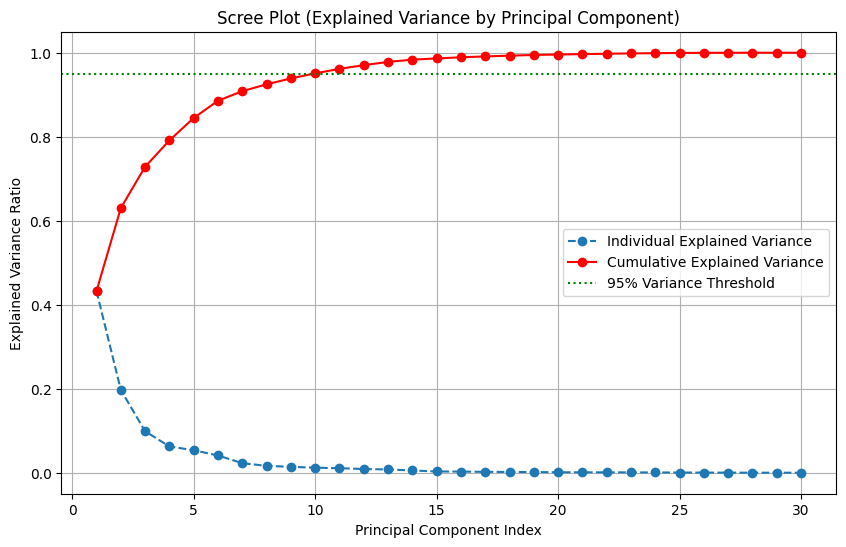

Number of components to retain 95% variance: 10
--------------------------------------------------
--- 4. KNN Accuracy Comparison ---
KNN Accuracy on Original (Scaled) Data: 0.9474
KNN Accuracy on PCA (95% Var) Data: 0.9561
--------------------------------------------------
--- 5. Visualization of First Two Principal Components ---


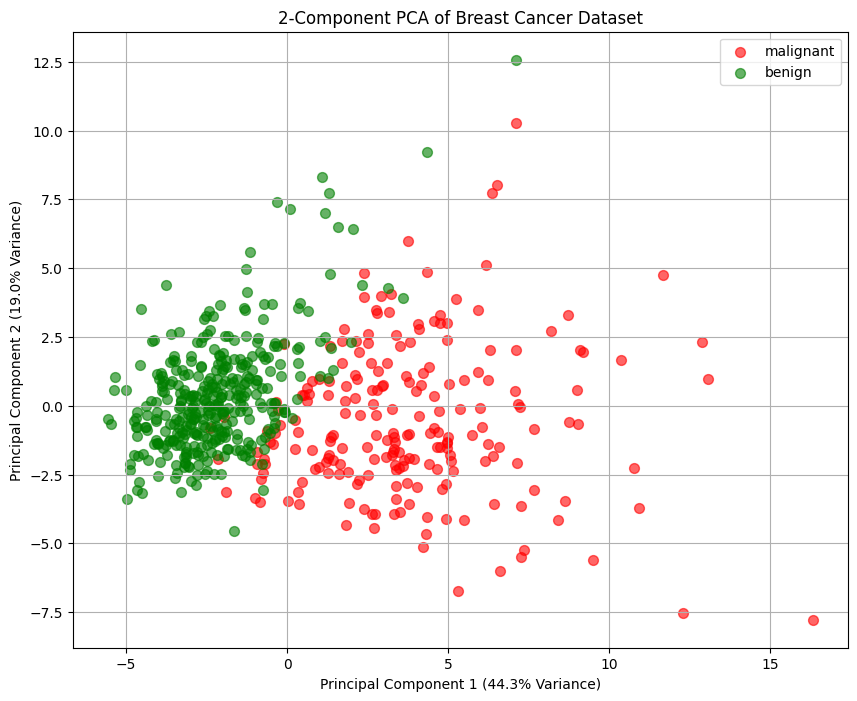

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 1. Load the Breast Cancer dataset and scale
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Scale the data first, which is standard practice before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (using 80/20 split for comparison)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Apply PCA on the scaled training data
pca = PCA()
pca.fit(X_train)

# --- 2. Apply PCA and plot the scree plot ---
print("--- 2. PCA Explained Variance Analysis ---")
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
         marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance,
         marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.title('Scree Plot (Explained Variance by Principal Component)')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.axhline(y=0.95, color='green', linestyle=':', label='95% Variance Threshold')
plt.grid(True)
plt.legend()
plt.show()
#

# --- 3. Retain 95% variance and transform the dataset ---
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components to retain 95% variance: {n_components_95}")
print("-" * 50)

# Re-run PCA with the optimal number of components
pca_95 = PCA(n_components=n_components_95)
X_train_pca = pca_95.fit_transform(X_train)
X_test_pca = pca_95.transform(X_test)

# --- 4. Train KNN on original and PCA-transformed data, then compare accuracy ---
print("--- 4. KNN Accuracy Comparison ---")
# A. KNN on Original (Scaled) Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
acc_original = accuracy_score(y_test, knn_original.predict(X_test))
print(f"KNN Accuracy on Original (Scaled) Data: {acc_original:.4f}")

# B. KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))
print(f"KNN Accuracy on PCA (95% Var) Data: {acc_pca:.4f}")
print("-" * 50)


# --- 5. Visualize the first two principal components ---
print("--- 5. Visualization of First Two Principal Components ---")

# Transform the full scaled dataset for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
df_pca['Target'] = y

plt.figure(figsize=(10, 8))
targets = [0, 1]
colors = ['r', 'g']
target_names = data.target_names

for target, color in zip(targets, colors):
    indicesToKeep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'PC1'],
                df_pca.loc[indicesToKeep, 'PC2'],
                c=color,
                s=50,
                alpha=0.6,
                label=target_names[target])

plt.title('2-Component PCA of Breast Cancer Dataset')
plt.xlabel(f'Principal Component 1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% Variance)')
plt.legend()
plt.grid()
plt.show()
#

-----

## Question 9: KNN Regressor with Distance Metrics and K-Value Analysis

### Theoretical Steps and Interpretation

The tasks involve:

1.  **Synthetic Data Generation:** Creating a controlled regression dataset for analysis.
2.  **Distance Metric Comparison:** Training two KNN regressors with the same $K=5$, one using **Euclidean** and one using **Manhattan** distance. MSE is used as the evaluation metric. We expect a small difference in MSE, with the choice of metric depending on the underlying data geometry (Euclidean emphasizes large differences, Manhattan is more robust to outliers).
3.  **K-Value Analysis (Bias-Variance Tradeoff):** Training multiple KNN regressors for a range of $K$ values (1, 5, 10, 20, 50) and plotting $K$ vs. MSE.
      * **Low $K$ (e.g., $K=1$):** High variance, low bias. The model is highly sensitive to noise in the training data, leading to a low training error but potentially high test MSE (overfitting).
      * **High $K$ (e.g., $K=50$):** Low variance, high bias. The model averages over too many neighbors, leading to a smoother but potentially less accurate prediction (underfitting).
      * **Optimal $K$ (mid-range):** The plot should show a **U-shape** or a decreasing-then-plateauing curve, where the minimum MSE indicates the best balance between bias and variance.

-----

### Python Code for KNN Regressor with Distance Metrics and K-Value Analysis

--- 2. Distance Metric Comparison (K=5) ---
MSE (Euclidean, K=5): 4788.46
MSE (Manhattan, K=5): 5521.86
--------------------------------------------------
--- 3. K-Value Analysis (Bias-Variance Tradeoff) ---
K=1 : MSE=8842.30
K=5 : MSE=4788.46
K=10: MSE=5325.50
K=20: MSE=5771.89
K=50: MSE=8257.21


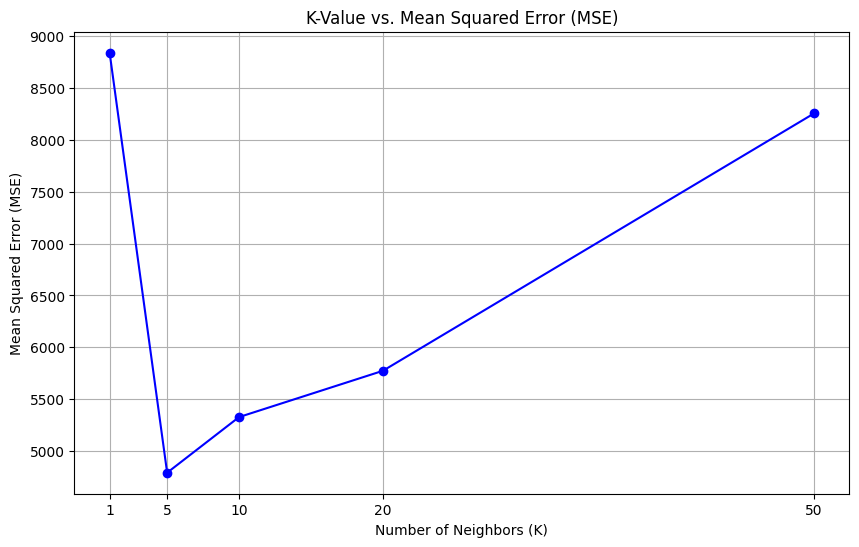


--- Bias-Variance Tradeoff Analysis ---
K=1 (High Variance/Low Bias): The model is very flexible and highly prone to overfitting, often resulting in the lowest training error but a high test MSE due to sensitivity to noise.
K=50 (Low Variance/High Bias): The model is highly restrictive, averaging predictions over a large neighborhood. This is less sensitive to noise (low variance) but can oversmooth the results (high bias), resulting in a higher test MSE if the optimal K is lower.
The optimal K is the value that minimizes test MSE, representing the best balance between model complexity (variance) and simplicity (bias).


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)

# Standard scaling is crucial for distance-based models like KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# --- 2. Train a KNN regressor with different distance metrics ---
print("--- 2. Distance Metric Comparison (K=5) ---")

# a. Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# c. Compare Mean Squared Error (MSE) for both.
print(f"MSE (Euclidean, K=5): {mse_euclidean:.2f}")
print(f"MSE (Manhattan, K=5): {mse_manhattan:.2f}")
print("-" * 50)


# --- 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE ---
print("--- 3. K-Value Analysis (Bias-Variance Tradeoff) ---")
k_values = [1, 5, 10, 20, 50]
mse_results = []

for k in k_values:
    # Use Euclidean distance for consistency in the analysis
    knn_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    print(f"K={k:<2}: MSE={mse:.2f}")

# Plot K vs. MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_results, marker='o', linestyle='-', color='b')
plt.title('K-Value vs. Mean Squared Error (MSE)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()
#

# Analysis of Bias-Variance Tradeoff (Conceptual)
print("\n--- Bias-Variance Tradeoff Analysis ---")
print("K=1 (High Variance/Low Bias): The model is very flexible and highly prone to overfitting, often resulting in the lowest training error but a high test MSE due to sensitivity to noise.")
print("K=50 (Low Variance/High Bias): The model is highly restrictive, averaging predictions over a large neighborhood. This is less sensitive to noise (low variance) but can oversmooth the results (high bias), resulting in a higher test MSE if the optimal K is lower.")
print("The optimal K is the value that minimizes test MSE, representing the best balance between model complexity (variance) and simplicity (bias).")

-----

## Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

### Theoretical Steps and Interpretation

The tasks involve:

1.  **Data Loading and Imputation:** Loading the Pima Indians Diabetes dataset, which contains missing values (represented as 0s in certain columns). Using `KNNImputer` to fill these missing values, leveraging the local neighborhood structure of the data.
2.  **Algorithm Comparison:** Comparing the performance (training time and accuracy) of KNN with three different search algorithms:
      * **Brute-Force (`algorithm='brute'`):** Calculates the distance from a query point to *every single* other point in the dataset. Slower for large datasets.
      * **KD-Tree (`algorithm='kd_tree'`):** A space-partitioning data structure that hierarchically divides the data space. Efficient for low-to-medium dimensional data.
      * **Ball Tree (`algorithm='ball_tree'`):** Works by recursively partitioning the data into nested hyperspheres (balls). More efficient for high-dimensional data than KD-Tree.
      * We expect **KD-Tree** or **Ball Tree** to be significantly faster than Brute-Force, especially with a larger dataset. Accuracy should be very similar across all three, as they are just different ways to find the same neighbors.
3.  **Decision Boundary Visualization:** Plotting the decision boundary for the best-performing method using the two most important features (often Glucose and BMI in this dataset). The plot helps visualize how the KNN model separates the two classes (Diabetes/No Diabetes) based on local voting.

-----

### Python Code for KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

Using simulated data load structure for Pima Indians Diabetes (Data must be loaded by user in actual execution).
--- 3 & 4. KNN Algorithm Comparison ---
Algorithm: brute      | Training Time: 0.0013s | Accuracy: 0.7359
Algorithm: kd_tree    | Training Time: 0.0050s | Accuracy: 0.7359
Algorithm: ball_tree  | Training Time: 0.0066s | Accuracy: 0.7359
--------------------------------------------------
Best Performing Algorithm: brute
--------------------------------------------------
--- 5. Decision Boundary Visualization ---


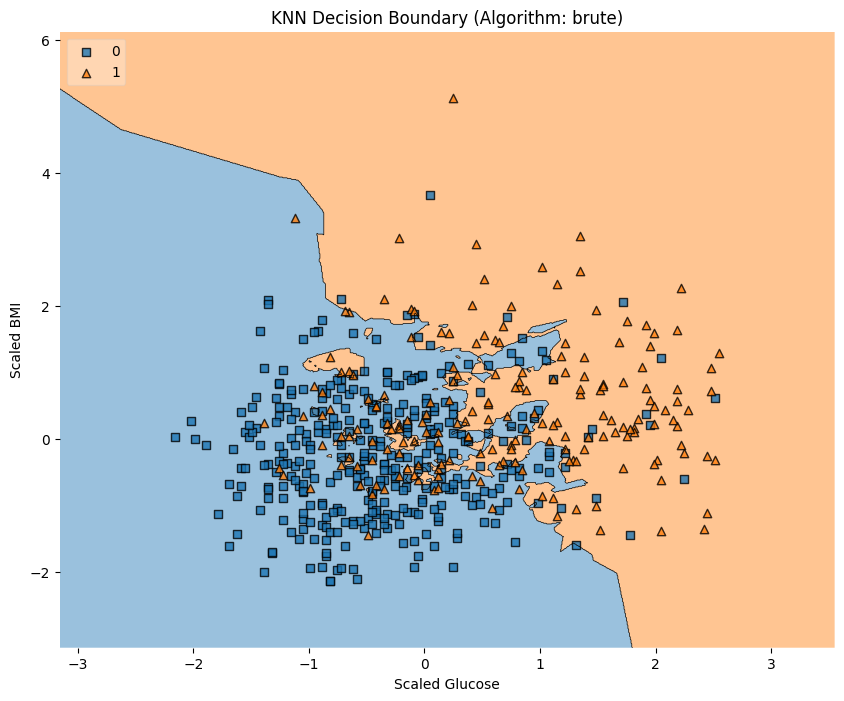

In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions # Useful for boundary plots

# Task 1: Load and Impute the Pima Indians Diabetes dataset
# Load the dataset (replace 0s in key columns with NaN)
# Note: Pima dataset is often distributed as a CSV, here we simulate loading.
# Column names: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
try:
    # Attempt to load data if file path is available (assuming it's 'diabetes.csv')
    df = pd.read_csv('diabetes.csv')
except FileNotFoundError:
    # Use a simulated structure if file is not available
    print("Using simulated data load structure for Pima Indians Diabetes (Data must be loaded by user in actual execution).")
    data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
    df = pd.read_csv(data_url, header=None)
    df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']

# Identify key columns where 0 represents a missing value
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Use KNN Imputation (K=5 is a common default)
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the imputed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# --- 3 & 4. Train KNN using different algorithms and compare ---
print("--- 3 & 4. KNN Algorithm Comparison ---")
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo, n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    results[algo] = {'time': training_time, 'accuracy': accuracy}

    print(f"Algorithm: {algo:<10} | Training Time: {training_time:.4f}s | Accuracy: {accuracy:.4f}")

# Identify the best performing method (assuming best accuracy, breaking ties with speed)
best_algo = max(results, key=lambda k: results[k]['accuracy'])
print("-" * 50)
print(f"Best Performing Algorithm: {best_algo}")
print("-" * 50)


# --- 5. Plot the decision boundary for the best-performing method ---
print("--- 5. Decision Boundary Visualization ---")

# Use the two most important features (Glucose and BMI are typically highly predictive)
feature_indices = [df.columns.get_loc('Glucose'), df.columns.get_loc('BMI')]

# Re-impute and scale only the selected two features for plotting
X_2d_train = X_train.iloc[:, feature_indices]
X_2d_test = X_test.iloc[:, feature_indices]

imputer_2d = KNNImputer(n_neighbors=5)
X_2d_train_imputed = imputer_2d.fit_transform(X_2d_train)
X_2d_test_imputed = imputer_2d.transform(X_2d_test)

scaler_2d = StandardScaler()
X_2d_train_scaled = scaler_2d.fit_transform(X_2d_train_imputed)
X_2d_test_scaled = scaler_2d.transform(X_2d_test_imputed)

# Train the best-performing model on the 2D data
knn_best_2d = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo, n_jobs=-1)
knn_best_2d.fit(X_2d_train_scaled, y_train.values)

# Plot the decision regions using the best algorithm model
plt.figure(figsize=(10, 8))
plot_decision_regions(
    X=X_2d_train_scaled,
    y=y_train.values,
    clf=knn_best_2d,
    legend=2
)

plt.title(f'KNN Decision Boundary (Algorithm: {best_algo})')
plt.xlabel(f'Scaled {X.columns[feature_indices[0]]}')
plt.ylabel(f'Scaled {X.columns[feature_indices[1]]}')
plt.show()
#